# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

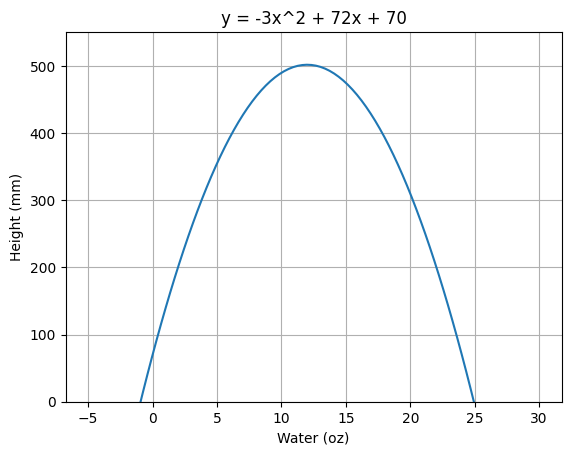

<Figure size 640x480 with 0 Axes>

In [13]:
x = np.linspace(-5, 30, 100)

y = -3*x**2+72*x+70

# Create the plot
plt.plot(x, y)
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Water (oz)')
plt.ylabel('Height (mm)')
plt.title('y = -3x^2 + 72x + 70')
plt.show()

plt.savefig('Parabola')

## 2.3 Plot $f(x_1, x_2)$.

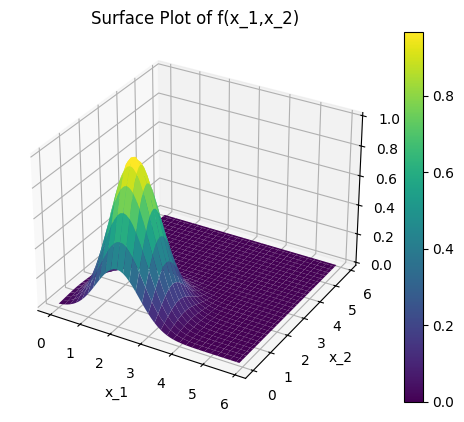

<Figure size 640x480 with 0 Axes>

In [12]:
# x, y ranges
x_range = np.arange(0, 6, 0.1) 

y_range = np.arange(0, 6, 0.1)

x, y = np.meshgrid(x_range, y_range)

# Calculate the corresponding z values
Z = np.exp(-((x - 2)**2 + (y - 1)**2))

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Z')
plt.title('Surface Plot of f(x_1,x_2)')

# Add colorbar
fig.colorbar(surf)

# Show the plot
plt.show()

plt.savefig('Surface')

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

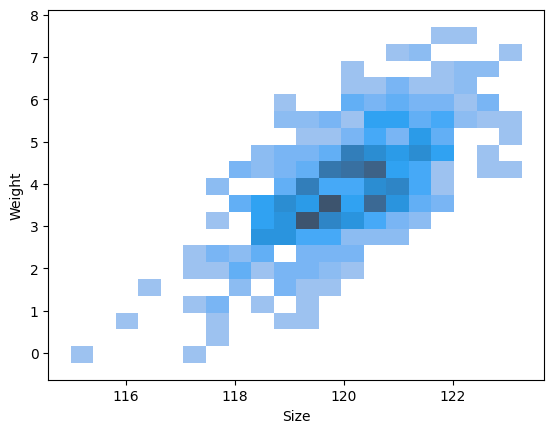

In [94]:
mean = [120, 4]

cov = [[1.5,1],[1,1.5]]

distribute = mvn(mean,cov)

samples = distribute.rvs(size=500, random_state=2)

fig = sns.histplot(x=samples[:,0], y=samples[:,1], bins=20)
fig.set_xlabel('Size')
fig.set_ylabel('Weight')


plt.savefig('Bivar_Hist')


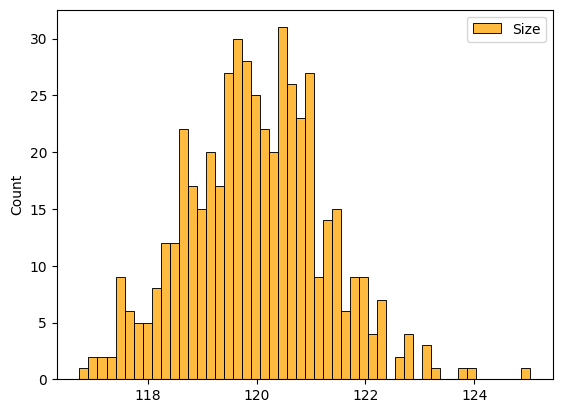

In [30]:
mean = [120]

cov = [1.5]

distribute = mvn(mean,cov)

samples = distribute.rvs(size=500, random_state=2)

fig = sns.histplot(data=samples, bins=50, color='Orange')

fig.legend(labels=['Size'])

plt.savefig('Size-Hist')

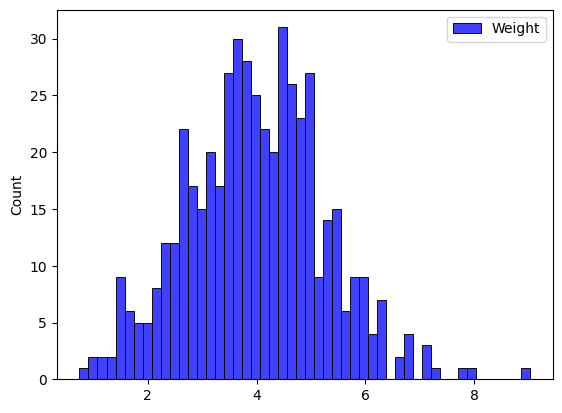

In [ ]:
fig = sns.histplot(data=samples[1], bins=50, color='Blue')

fig.legend(labels=['Weight'])

plt.savefig('Weight-Hist')

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

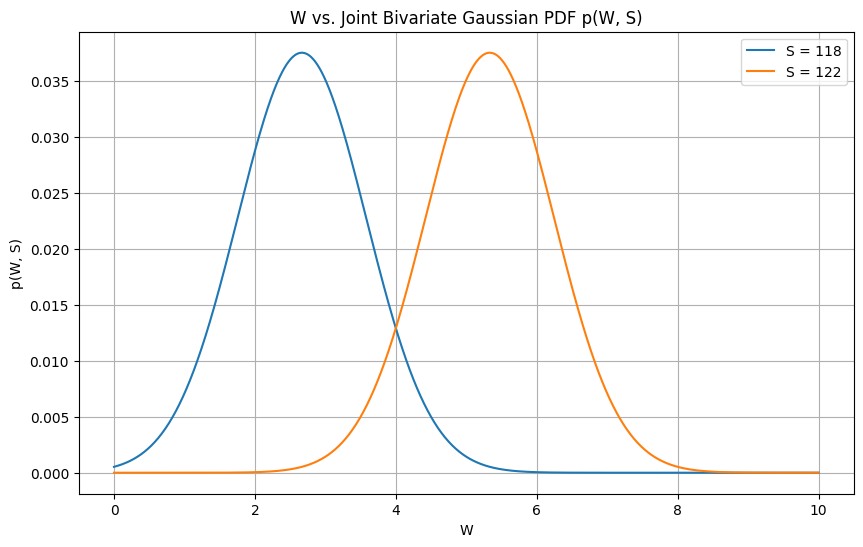

In [33]:
mean = [120, 4] 
cov = [[1.5, 1], [1, 1.5]] 

W = np.linspace(0, 10, 1001)

S_values = [118, 122]

pdf_values = {}
for S_fixed in S_values:
    pdf_values[S_fixed] = []
    for w in W:
        x = [S_fixed, w] 
        pdf = mvn.pdf(x, mean=mean, cov=cov)
        pdf_values[S_fixed].append(pdf)

# Plot the results
plt.figure(figsize=(10, 6))
for S_fixed in S_values:
    plt.plot(W, pdf_values[S_fixed], label=f"S = {S_fixed}")

plt.title("W vs. Joint Bivariate Gaussian PDF p(W, S)")
plt.xlabel("W")
plt.ylabel("p(W, S)")
plt.legend()
plt.grid()
plt.savefig('Fixed-S')
plt.show()



## 3.5(a) Function to simulate draws from $T^{*}$.

In [39]:
def simulate_T_star(num_simulations):
    lambda_N = 3
    
    T_star_samples = []
    
    for _ in range(num_simulations):
        N = np.random.poisson(lambda_N)
        
        # Calculate W, S, eps for each sample
        W = np.random.normal(4, np.sqrt(1.5), size=N)
        S = np.random.normal(120, np.sqrt(1.5), size=N)
        eps = np.random.normal(0, 5, size=N)
        
        # Calculate T for each sample
        T = 60 + 0.6 * W + 0.2 * S + eps
        
        # Sum to get T*
        T_star = np.sum(T) if N > 0 else 0
        T_star_samples.append(T_star)
    
    return np.array(T_star_samples)

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [40]:
# Run simulation
simulation = simulate_T_star(1000)


In [41]:
# Calc mean and SD
mean = np.mean(simulation)

SD = np.std(simulation)

print(f'Mean: {round(mean,2)}')
print(f'Standard Deviation: {round(SD,2)}')

Mean: 266.92
Standard Deviation: 156.52


# 4.1: Examining the Data

In [97]:
# Steve's solution
data = pd.read_csv("data/points.csv").values

x = data[:,0]
y = data[:,1]


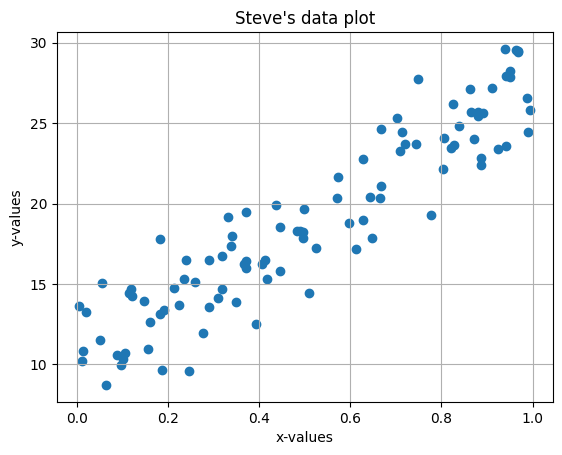

In [98]:
plt.scatter(x, y)
plt.ylim()
plt.grid()
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title("Steve's data plot")
plt.savefig("Steve_data")
plt.show()



## 4.2: Adding the Intercept/Bias Term

In [102]:
# Steve's solution
intercept = np.ones((x.shape[0],1))

x_reshaped = x.reshape(-1, 1)
X = np.hstack([intercept, x_reshaped]) # horizontally stack the ones and x coordinates next to each other

print(X.shape)
print(y.shape)

w = np.array([1,2])
print(w.shape)

(100, 2)
(100,)
(2,)


## 4.4: Implementing the LinearRegression Class

In [79]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y.T

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        if self.w is None:
            raise ValueError("Model has not been fitted yet.")
        return X @ self.w

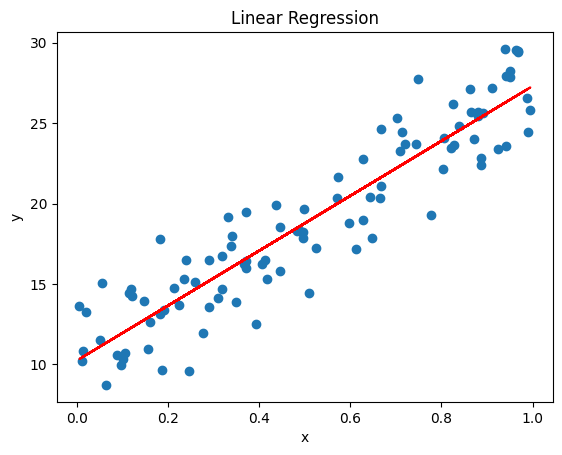

In [81]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [84]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193986


In [86]:
mse = np.sum((y-y_pred)**2)/len(y)

print(mse)

4.439331220193985
